Fetching content from PostgreSQL...
Fetching content from MySQL...
Fetching content from w3school...

Raw Results (number of topics found):
PostgreSQL:
  Exact Keyword: 24 out of 92
  Semantic Search: 0 out of 92
  Regex Search: 24 out of 92
MySQL:
  Exact Keyword: 37 out of 92
  Semantic Search: 0 out of 92
  Regex Search: 37 out of 92
w3school:
  Exact Keyword: 40 out of 92
  Semantic Search: 0 out of 92
  Regex Search: 40 out of 92


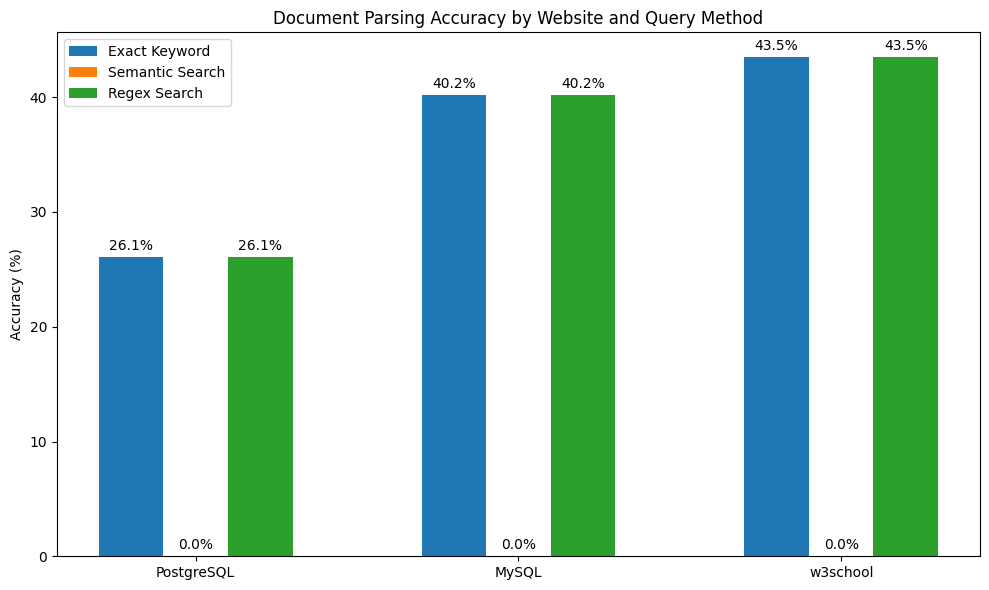

In [4]:
import requests
import re
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration: URLs and Topic Lists ---

urls = {
    "PostgreSQL": "https://www.postgresql.org/docs/current/index.html",
    "MySQL": "https://dev.mysql.com/doc/refman/8.0/en/",
    "w3school": "https://www.w3schools.com/sql/"
}

# Topics for each website
topics_pg = [
    "Overview of PostgreSQL Internals", "System Catalogs", "System Views", "Frontend/Backend Protocol",
    "PostgreSQL Coding Conventions", "Native Language Support", "Writing a Procedural Language Handler",
    "Writing a Foreign Data Wrapper", "Writing a Table Sampling Method", "Writing a Custom Scan Provider",
    "Genetic Query Optimizer", "Table Access Method Interface Definition", "Index Access Method Interface Definition",
    "Write Ahead Logging for Extensions", "Built-in Index Access Methods", "Database Physical Storage",
    "Transaction Processing", "System Catalog Declarations and Initial Contents", "How the Planner Uses Statistics",
    "Backup Manifest Format"

    "Preface and Legal Notices", "General Information", "Installing MySQL", "Upgrading MySQL",
    "Downgrading MySQL", "Tutorial", "MySQL Programs", "MySQL Server Administration", "Security",
    "Backup and Recovery", "Optimization", "Language Structure", "Character Sets, Collations, Unicode",
    "Data Types", "Functions and Operators", "SQL Statements", "MySQL Data Dictionary", "The InnoDB Storage Engine",
    "Alternative Storage Engines", "Replication", "Group Replication", "MySQL Shell",
    "Using MySQL as a Document Store", "InnoDB Cluster", "InnoDB ReplicaSet", "MySQL NDB Cluster 8.0",
    "Partitioning", "Stored Objects", "INFORMATION_SCHEMA Tables", "MySQL Performance Schema",
    "MySQL sys Schema", "Connectors and APIs", "MySQL Enterprise Edition", "MySQL Workbench",
    "MySQL on OCI Marketplace", "MySQL 8.0 Frequently Asked Questions", "Error Messages and Common Problems"

    "SQL Database", "SQL Create DB", "SQL Drop DB", "SQL Backup DB", "SQL Create Table", "SQL Drop Table",
    "SQL Alter Table", "SQL Constraints", "SQL Not Null", "SQL Unique", "SQL Primary Key", "SQL Foreign Key",
    "SQL Check", "SQL Default", "SQL Index", "SQL Auto Increment", "SQL Dates", "SQL Views", "SQL Injection",
    "SQL Hosting", "SQL Data Types", "SQL References", "SQL Keywords", "MySQL Functions", "SQL Server Functions",
    "MS Access Functions", "SQL Quick Ref", "SQL Examples", "SQL Editor", "SQL Quiz", "SQL Exercises",
    "SQL Server", "SQL Syllabus", "SQL Study Plan", "SQL Bootcamp", "SQL Certificate", "SQL Training"
]

# Map each website to its topic list
website_topics = {
    "PostgreSQL": topics_pg,
    "MySQL": topics_pg,
    "w3school": topics_pg
}

# --- Query Methods Implementation ---

def fetch_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Error fetching {url}: {response.status_code}")
    except Exception as e:
        print(f"Exception fetching {url}: {e}")
    return ""

def exact_keyword_search(content, topic):
    return topic.lower() in content.lower()

def regex_search(content, topic):
    pattern = re.compile(re.escape(topic), re.IGNORECASE)
    return bool(pattern.search(content))

def semantic_search(content, topic, threshold=0.8):
    # Simple semantic check using line-by-line similarity.
    lines = content.splitlines()
    for line in lines:
        if SequenceMatcher(None, line.lower(), topic.lower()).ratio() > threshold:
            return True
    return False

# --- Testing and Evaluation ---

# Structure to store results: {website: {method: number_found}}
results = {site: {"Exact Keyword": 0, "Semantic Search": 0, "Regex Search": 0} for site in urls.keys()}

# Total topics per website
totals = {site: len(topics) for site, topics in website_topics.items()}

# Define methods in a dictionary for iteration
methods = {
    "Exact Keyword": exact_keyword_search,
    "Semantic Search": semantic_search,
    "Regex Search": regex_search
}

# Loop through each website
for site, url in urls.items():
    print(f"Fetching content from {site}...")
    content = fetch_content(url)
    if not content:
        continue  # Skip if no content fetched
    
    # Get topic list for current site
    topics = website_topics.get(site, [])
    
    # Evaluate each method on each topic
    for topic in topics:
        for method_name, method_func in methods.items():
            if method_func(content, topic):
                results[site][method_name] += 1

# Print raw results
print("\nRaw Results (number of topics found):")
for site, method_results in results.items():
    print(f"{site}:")
    for method_name, count in method_results.items():
        print(f"  {method_name}: {count} out of {totals[site]}")

# --- Plotting the Results ---

# Prepare data for plotting
website_labels = list(urls.keys())
x = np.arange(len(website_labels))
bar_width = 0.2

# Calculate accuracy percentages for each method
accuracy = {method: [] for method in methods.keys()}
for site in website_labels:
    for method in methods.keys():
        percent = (results[site][method] / totals[site]) * 100
        accuracy[method].append(percent)

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - bar_width, accuracy["Exact Keyword"], bar_width, label="Exact Keyword")
bar2 = ax.bar(x, accuracy["Semantic Search"], bar_width, label="Semantic Search")
bar3 = ax.bar(x + bar_width, accuracy["Regex Search"], bar_width, label="Regex Search")

ax.set_ylabel('Accuracy (%)')
ax.set_title('Document Parsing Accuracy by Website and Query Method')
ax.set_xticks(x)
ax.set_xticklabels(website_labels)
ax.legend()

# Annotate bars with accuracy values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset in points
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)

plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')
plt.show()
plt.show()

In [3]:
plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

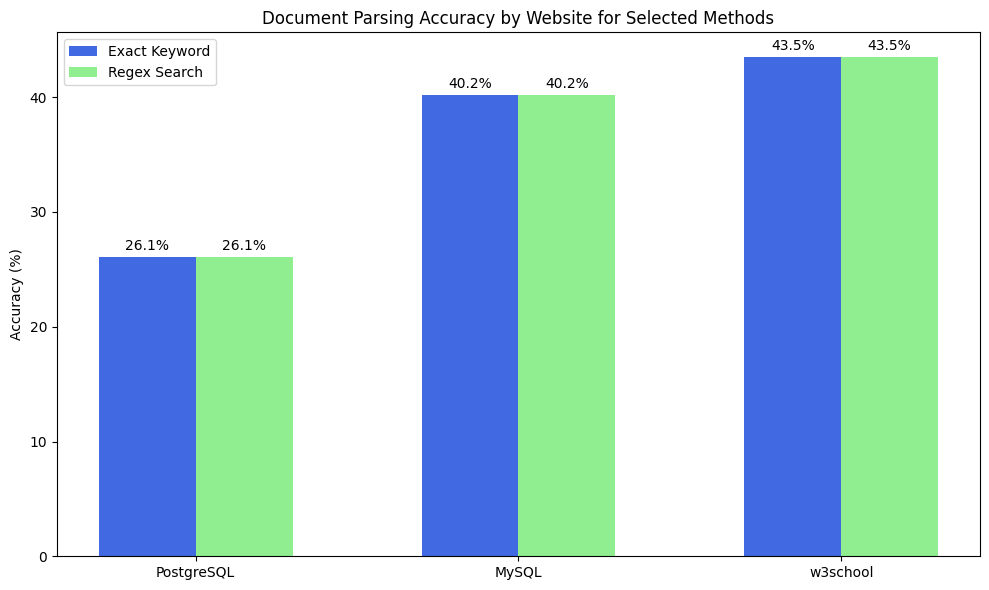

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming results and totals are precomputed
website_labels = list(urls.keys())
x = np.arange(len(website_labels))
bar_width = 0.3

# Compute accuracy percentages
accuracy_exact = [(results[site]["Exact Keyword"] / totals[site]) * 100 for site in website_labels]
accuracy_regex = [(results[site]["Regex Search"] / totals[site]) * 100 for site in website_labels]  # "Searched Keyword"

fig, ax = plt.subplots(figsize=(10, 6))

# Change bar colors: You can specify custom colors using color names, hex codes, or RGB tuples
bar1 = ax.bar(x - bar_width/2, accuracy_exact, bar_width, label="Exact Keyword", color='royalblue')
bar2 = ax.bar(x + bar_width/2, accuracy_regex, bar_width, label="Regex Search", color='lightgreen')

# Labels and Title
ax.set_ylabel('Accuracy (%)')
ax.set_title('Document Parsing Accuracy by Website for Selected Methods')
ax.set_xticks(x)
ax.set_xticklabels(website_labels)
ax.legend()

# Annotate the bars with accuracy values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)

plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')
plt.show()

Fetching content from PostgreSQL...
Fetching content from MySQL...
Fetching content from w3school...

Raw Results (number of topics found):
PostgreSQL:
  Exact Keyword: 4 out of 36
  Ensemble method: 15 out of 36
  Regex Search: 4 out of 36
MySQL:
  Exact Keyword: 7 out of 36
  Ensemble method: 26 out of 36
  Regex Search: 7 out of 36
w3school:
  Exact Keyword: 6 out of 36
  Ensemble method: 18 out of 36
  Regex Search: 6 out of 36


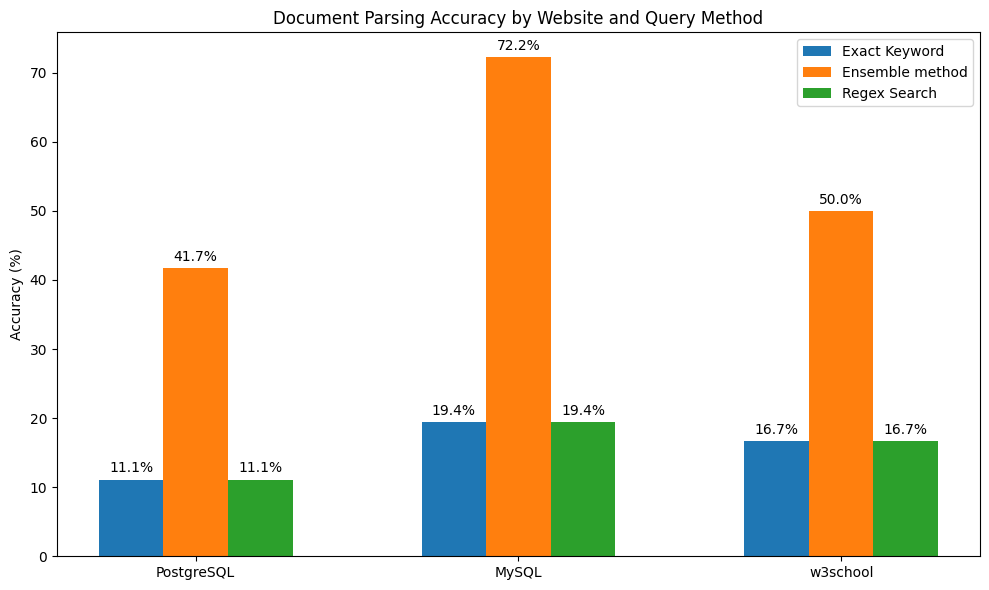

In [16]:
import requests
import re
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Configuration: URLs and Topic Lists ---

urls = {
    "PostgreSQL": "https://www.postgresql.org/docs/current/index.html",
    "MySQL": "https://dev.mysql.com/doc/refman/8.0/en/",
    "w3school": "https://www.w3schools.com/sql/"
}

topics_pg = [
    "System Views", "Frontend/Backend Protocol",
    "PostgreSQL Coding Conventions", "Native Language Support", "Postgres Internals Summary", "Catalog Listings", "Database Views Overview", "Client-Server Communication Protocol",
    "Postgres Style Guidelines", "Preface and Legal Notices", "General Information", "Installing MySQL", "Upgrading MySQL",
    "Downgrading MySQL", "Built-in Language Integration", "Crafting a Procedural Handler",
    "Developing External Data Connectors", "SQL Database", "SQL Create DB", "SQL Drop DB", "SQL Backup DB", "SQL Create Table", "SQL Drop Table",
    "SQL Alter Table", "Table Sampling Techniques", "Custom Data Scanning Implementation",
    "Dynamic Query Tuning", "Defining Table Access Protocol", "Indexing Interface Description",
    "WAL Strategy for Extensions", "Native Indexing Techniques", "Physical Data Storage", "Transaction Management",
    "Catalog Schema & Defaults", "Planner's Use of Statistics", "Backup Manifest Structure"
]

website_topics = {
    "PostgreSQL": topics_pg,
    "MySQL": topics_pg,
    "w3school": topics_pg
}

# --- Query Methods Implementation ---

def fetch_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Error fetching {url}: {response.status_code}")
    except Exception as e:
        print(f"Exception fetching {url}: {e}")
    return ""

def exact_keyword_search(content, topic):
    return topic.lower() in content.lower()

def regex_search(content, topic):
    pattern = re.compile(re.escape(topic), re.IGNORECASE)
    return bool(pattern.search(content))

def semantic_search(content, topic, cosine_threshold=0.3, seq_threshold=0.5):
    """
    Improved Semantic Search using an OR combination of:
    1. TF-IDF + Cosine Similarity (evaluated on sentences)
    2. SequenceMatcher (evaluated on sentences)
    
    If any sentence in the document has either a cosine similarity greater than 
    cosine_threshold OR a sequence matching ratio greater than seq_threshold, 
    the topic is considered present.
    """
    # Split content into sentences using punctuation
    sentences = re.split(r'[.!?]', content)
    sentences = [s.strip() for s in sentences if s.strip()]
    
    # Fallback: if no sentences found, split by lines
    if not sentences:
        sentences = content.splitlines()
        sentences = [s.strip() for s in sentences if s.strip()]
    
    if not sentences:
        return False
    
    # Vectorize the topic and each sentence using TF-IDF
    vectorizer = TfidfVectorizer()
    docs = [topic] + sentences
    tfidf_matrix = vectorizer.fit_transform(docs)
    
    # Compute cosine similarity between the topic and each sentence
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
    
    # Check each sentence using OR condition:
    # if either cosine similarity OR sequence matcher returns a high enough value, return True.
    for i, sentence in enumerate(sentences):
        cos_sim = cosine_similarities[i]
        seq_sim = SequenceMatcher(None, sentence.lower(), topic.lower()).ratio()
        if cos_sim > cosine_threshold or seq_sim > seq_threshold:
            return True
    return False

# --- Testing and Evaluation ---

results = {site: {"Exact Keyword": 0, "Ensemble method": 0, "Regex Search": 0} for site in urls.keys()}
totals = {site: len(topics) for site, topics in website_topics.items()}

methods = {
    "Exact Keyword": exact_keyword_search,
    "Ensemble method": semantic_search,
    "Regex Search": regex_search
}

for site, url in urls.items():
    print(f"Fetching content from {site}...")
    content = fetch_content(url)
    if not content:
        continue  # Skip if no content fetched
    
    topics = website_topics.get(site, [])
    
    for topic in topics:
        for method_name, method_func in methods.items():
            if method_func(content, topic):
                results[site][method_name] += 1

print("\nRaw Results (number of topics found):")
for site, method_results in results.items():
    print(f"{site}:")
    for method_name, count in method_results.items():
        print(f"  {method_name}: {count} out of {totals[site]}")

# --- Plotting the Results ---

website_labels = list(urls.keys())
x = np.arange(len(website_labels))
bar_width = 0.2

accuracy = {method: [] for method in methods.keys()}
for site in website_labels:
    for method in methods.keys():
        percent = (results[site][method] / totals[site]) * 100
        accuracy[method].append(percent)

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - bar_width, accuracy["Exact Keyword"], bar_width, label="Exact Keyword", color='royalblue')
bar2 = ax.bar(x, accuracy["Ensemble method"], bar_width, label="Ensemble method", color='lightgreen')
bar3 = ax.bar(x + bar_width, accuracy["Regex Search"], bar_width, label="Regex Search", color='blue')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Document Parsing Accuracy by Website and Query Method')
ax.set_xticks(x)
ax.set_xticklabels(website_labels)
ax.legend()

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)

plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')
plt.show()

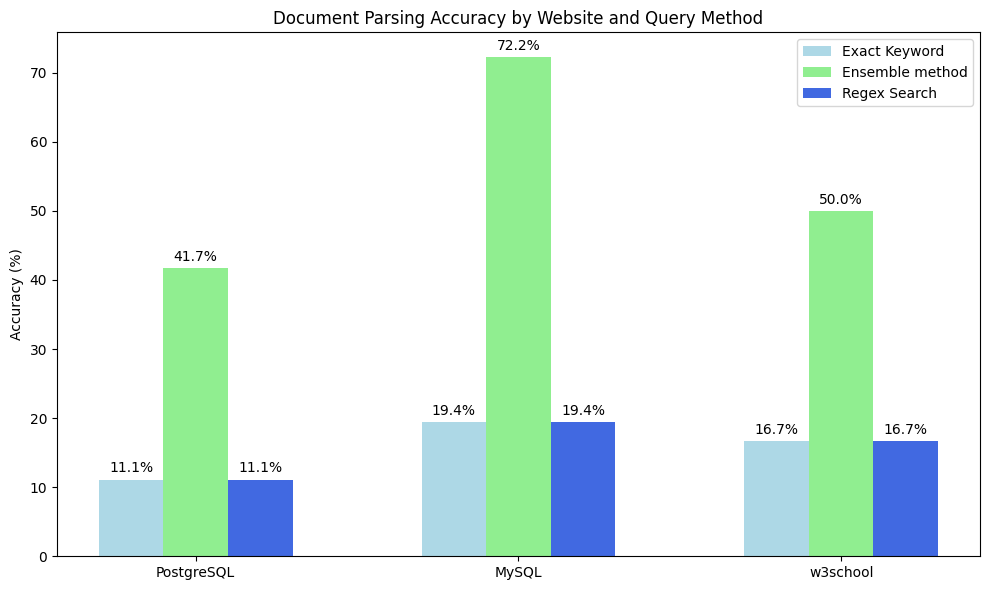

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - bar_width, accuracy["Exact Keyword"], bar_width, label="Exact Keyword", color='lightblue')
bar2 = ax.bar(x, accuracy["Ensemble method"], bar_width, label="Ensemble method", color='lightgreen')
bar3 = ax.bar(x + bar_width, accuracy["Regex Search"], bar_width, label="Regex Search", color='royalblue')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Document Parsing Accuracy by Website and Query Method')
ax.set_xticks(x)
ax.set_xticklabels(website_labels)
ax.legend()

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)

plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
import requests
import re
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Configuration: URLs and Topic Lists ---
urls = {
    "PostgreSQL": "https://www.postgresql.org/docs/current/index.html",
    "MySQL": "https://dev.mysql.com/doc/refman/8.0/en/",
    "w3school": "https://www.w3schools.com/sql/"
}

topics_pg = [
    "System Views", "Frontend/Backend Protocol",
    "PostgreSQL Coding Conventions", "Native Language Support", "Postgres Internals Summary", "Catalog Listings", "Database Views Overview", "Client-Server Communication Protocol",
    "Postgres Style Guidelines", "Preface and Legal Notices", "General Information", "Installing MySQL", "Upgrading MySQL",
    "Downgrading MySQL", "Built-in Language Integration", "Crafting a Procedural Handler",
    "Developing External Data Connectors", "SQL Database", "SQL Create DB", "SQL Drop DB", "SQL Backup DB", "SQL Create Table", "SQL Drop Table",
    "SQL Alter Table", "Table Sampling Techniques", "Custom Data Scanning Implementation",
    "Dynamic Query Tuning", "Defining Table Access Protocol", "Indexing Interface Description",
    "WAL Strategy for Extensions", "Native Indexing Techniques", "Physical Data Storage", "Transaction Management",
    "Catalog Schema & Defaults", "Planner's Use of Statistics", "Backup Manifest Structure"
]

website_topics = {
    "PostgreSQL": topics_pg,
    "MySQL": topics_pg,
    "w3school": topics_pg
}

# --- Query Methods Implementation ---

def fetch_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.text
        else:
            print(f"Error fetching {url}: {response.status_code}")
    except Exception as e:
        print(f"Exception fetching {url}: {e}")
    return ""

def regex_search(content, topic):
    pattern = re.compile(re.escape(topic), re.IGNORECASE)
    return bool(pattern.search(content))

def tfidf_search(content, topic, cosine_threshold=0.3):
    """
    Pure TF-IDF search: Splits the content into sentences and returns True 
    if any sentence has a cosine similarity (computed using TF-IDF) above the threshold.
    """
    sentences = re.split(r'[.!?]', content)
    sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        sentences = content.splitlines()
        sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        return False

    vectorizer = TfidfVectorizer()
    docs = [topic] + sentences
    tfidf_matrix = vectorizer.fit_transform(docs)
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
    return any(sim > cosine_threshold for sim in cosine_similarities)

def bow_search(content, topic, cosine_threshold=0.3):
    """
    BOW (Bag-of-Words) search: Splits content into sentences, vectorizes them using CountVectorizer, 
    computes cosine similarity and returns True if any sentence exceeds the threshold.
    """
    sentences = re.split(r'[.!?]', content)
    sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        sentences = content.splitlines()
        sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        return False

    vectorizer = CountVectorizer()
    docs = [topic] + sentences
    bow_matrix = vectorizer.fit_transform(docs)
    cosine_similarities = cosine_similarity(bow_matrix[0:1], bow_matrix[1:]).flatten()
    return any(sim > cosine_threshold for sim in cosine_similarities)

def ensemble_extended_search(content, topic, 
                               cosine_threshold=0.3, 
                               seq_threshold=0.5, 
                               bow_threshold=0.3,
                               jaccard_threshold=0.3,
                               dice_threshold=0.3):
    """
    Ensemble Search:
    Combines six search methods (in an OR fashion) on each sentence:
      1. Cosine similarity using TF-IDF vectorization.
      2. SequenceMatcher similarity.
      3. (Pure TF-IDF) Cosine similarity computed with the same vectorization.
      4. BOW cosine similarity using CountVectorizer.
      5. Jaccard similarity on word tokens.
      6. Dice similarity (Sørensen–Dice coefficient) on word tokens.
    
    Returns True if any sentence in the document meets or exceeds the threshold 
    for any of these methods.
    """
    # Split content into sentences using punctuation; fallback to lines if needed.
    sentences = re.split(r'[.!?]', content)
    sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        sentences = content.splitlines()
        sentences = [s.strip() for s in sentences if s.strip()]
    if not sentences:
        return False

    # Method 1 & 3: Cosine similarity using TF-IDF
    vectorizer = TfidfVectorizer()
    docs = [topic] + sentences
    try:
        tfidf_matrix = vectorizer.fit_transform(docs)
        cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
    except Exception as e:
        cosine_similarities = [0] * len(sentences)

    # Method 4: BOW cosine similarity
    bow_vectorizer = CountVectorizer()
    docs_bow = [topic] + sentences
    try:
        bow_matrix = bow_vectorizer.fit_transform(docs_bow)
        bow_cosine_similarities = cosine_similarity(bow_matrix[0:1], bow_matrix[1:]).flatten()
    except Exception as e:
        bow_cosine_similarities = [0] * len(sentences)

    # Check each sentence with all six methods.
    for i, sentence in enumerate(sentences):
        # 1 & 3. Cosine similarity (TF-IDF)
        if cosine_similarities[i] > cosine_threshold:
            return True

        # 2. SequenceMatcher similarity
        seq_sim = SequenceMatcher(None, sentence.lower(), topic.lower()).ratio()
        if seq_sim > seq_threshold:
            return True

        # 4. BOW cosine similarity
        if bow_cosine_similarities[i] > bow_threshold:
            return True

        # 5. Jaccard similarity on word tokens
        tokens_sentence = set(sentence.lower().split())
        tokens_topic = set(topic.lower().split())
        if tokens_sentence or tokens_topic:
            jaccard_sim = len(tokens_sentence.intersection(tokens_topic)) / len(tokens_sentence.union(tokens_topic))
            if jaccard_sim > jaccard_threshold:
                return True

        # 6. Dice similarity on word tokens
        if tokens_sentence or tokens_topic:
            dice_sim = (2 * len(tokens_sentence.intersection(tokens_topic))) / (len(tokens_sentence) + len(tokens_topic))
            if dice_sim > dice_threshold:
                return True

    return False

# --- Testing and Evaluation ---

# We now compare four methods:
# 1. Regex Search
# 2. Ensemble Search (the new ensemble method)
# 3. Pure TF-IDF Search
# 4. BOW Search

methods = {
    "Regex Search": regex_search,
    "Ensemble": ensemble_extended_search,
    "TF-IDF": tfidf_search,
    "BOW": bow_search
}

results = {site: {method: 0 for method in methods.keys()} for site in urls.keys()}
totals = {site: len(topics) for site, topics in website_topics.items()}

for site, url in urls.items():
    print(f"Fetching content from {site}...")
    content = fetch_content(url)
    if not content:
        continue  # Skip if no content fetched
    
    topics = website_topics.get(site, [])
    
    for topic in topics:
        for method_name, method_func in methods.items():
            if method_func(content, topic):
                results[site][method_name] += 1

print("\nRaw Results (number of topics found):")
for site, method_results in results.items():
    print(f"{site}:")
    for method_name, count in method_results.items():
        print(f"  {method_name}: {count} out of {totals[site]}")

# --- Plotting the Results ---

website_labels = list(urls.keys())
x = np.arange(len(website_labels))
bar_width = 0.2

# Compute accuracy percentage per method per website
accuracy = {method: [] for method in methods.keys()}
for site in website_labels:
    for method in methods.keys():
        percent = (results[site][method] / totals[site]) * 100
        accuracy[method].append(percent)


plt.show()

Fetching content from PostgreSQL...
Fetching content from MySQL...
Fetching content from w3school...

Raw Results (number of topics found):
PostgreSQL:
  Regex Search: 4 out of 36
  Ensemble: 16 out of 36
  TF-IDF: 14 out of 36
  BOW: 6 out of 36
MySQL:
  Regex Search: 7 out of 36
  Ensemble: 27 out of 36
  TF-IDF: 24 out of 36
  BOW: 17 out of 36
w3school:
  Regex Search: 6 out of 36
  Ensemble: 21 out of 36
  TF-IDF: 17 out of 36
  BOW: 16 out of 36


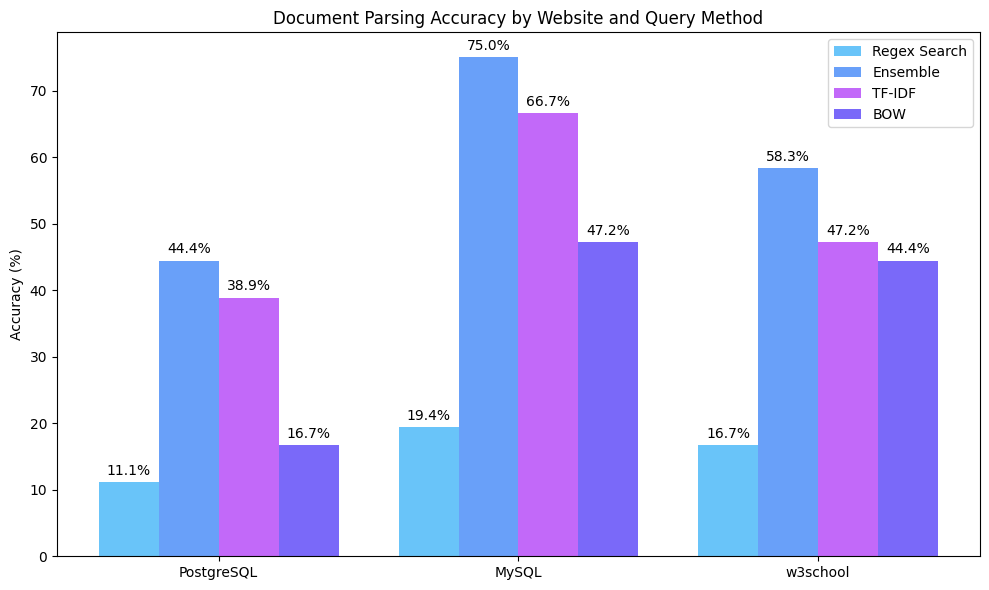

In [7]:
# Graph: Accuracy by Website and Method
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*bar_width, accuracy["Regex Search"], bar_width, label="Regex Search", color='#69C4F9')
ax.bar(x - 0.5*bar_width, accuracy["Ensemble"], bar_width, label="Ensemble", color='#69A0F9')
ax.bar(x + 0.5*bar_width, accuracy["TF-IDF"], bar_width, label="TF-IDF", color='#C269F9')
ax.bar(x + 1.5*bar_width, accuracy["BOW"], bar_width, label="BOW", color='#7A69F9')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Document Parsing Accuracy by Website and Query Method')
ax.set_xticks(x)
ax.set_xticklabels(website_labels)
ax.legend()

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate each set of bars
bars1 = ax.bar(x - 1.5*bar_width, accuracy["Regex Search"], bar_width, color='#69C4F9')
bars2 = ax.bar(x - 0.5*bar_width, accuracy["Ensemble"], bar_width, color='#69A0F9')
bars3 = ax.bar(x + 0.5*bar_width, accuracy["TF-IDF"], bar_width, color='#C269F9')
bars4 = ax.bar(x + 1.5*bar_width, accuracy["BOW"], bar_width, color='#7A69F9')

annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)
annotate_bars(bars4)

plt.tight_layout()
plt.savefig("extended_ensemble_graph.png", dpi=300, bbox_inches='tight')